In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from qutip import *

In [61]:
# Parameters

w0 = 1                           #Atomic Frequency
w0_res = 1                       #Atomic Frequency of the bath element
f1 = 0.6/np.sqrt(2)              #Strength Constant 1
f2 = 0.6                         #Strength Constant 2
T = np.arange(0.01,10,0.1)       #Temperature
Beta = 1/T                       #Inv Temperature

In [62]:
# Operators

hatom = 0.5*w0*sigmaz()
sigma_m = Qobj(np.array([[0,0],[1,0]]))
sigma_p = Qobj(np.array([[0,1],[0,0]]))
s = f1*sigmaz()+f2*sigma_m
sd = f1*sigmaz()+f2*sigma_p

def z(beta):
    "Partition Function of the two level atom in thermal equilibrium"
    return np.exp(-0.5*beta*w0_res)+np.exp(0.5*beta*w0_res)

def rho_th(beta):
    "Density Matrix of the two level atom ensemble in thermal equilibrium"
    return Qobj(np.array([[np.exp(-0.5*beta*w0_res)/z(beta),0],[0,np.exp(0.5*beta*w0_res)/z(beta)]]))

def c1(Nmax, beta):
    "Constant relating the bath element (atom)"
    return Nmax*(sigma_m*sigma_p*rho_th(beta)).tr()

def c2(Nmax, beta):
    "Constant relating the bath element (atom)"
    return Nmax*(sigma_p*sigma_m*rho_th(beta)).tr()

def c_op_list(Nmax, beta): 
    "Set of the dissipator operators"
    return [np.sqrt(c1(Nmax, beta))*s, np.sqrt(c2(Nmax, beta))*sd]

def rho_ss(Nmax, beta):
    "Steady State Density Matrix of the Atom"
    return steadystate(hatom, c_op_list(Nmax, beta))

def coh_ss(Nmax, beta):
    "Coherence"
    return np.abs((sigmax()*rho_ss(Nmax, beta)+1j*sigmay()*rho_ss(Nmax, beta)).tr())

def coh_nmax(Nmax):
    "Coherence function of N bath elements (Nmax)"
    coh_n = np.array([])
    for i in range(0,len(Beta)):
        coh_n = np.append(coh_n, coh_ss(Nmax, Beta[i]))
    return coh_n

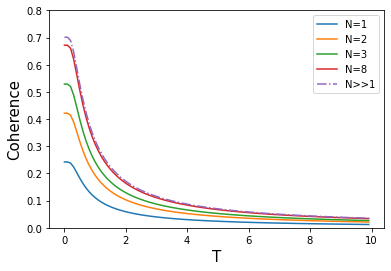

In [63]:
plt.plot(T,coh_nmax(1))
plt.plot(T,coh_nmax(2))
plt.plot(T,coh_nmax(3))
plt.plot(T,coh_nmax(8))
plt.plot(T,coh_nmax(20),"-.")
plt.xlabel("T",size=15)
plt.ylabel("Coherence", size=15)
plt.ylim(0,0.8)
plt.legend(["N=1", "N=2", "N=3", "N=8", "N>>1"])
plt.show()